In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import random
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
import torch.nn.functional as F
dotenv.load_dotenv(dotenv.find_dotenv())
torch.manual_seed(42)
np.random.seed(42)

In [2]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/tt_3bff/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20250130_NBFF_NODE/"
# path_GRU_Sweep = pathTT + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.3ee/20240702_GRU_3BFF/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTGRU_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    # Find int eh subfolder where latent_size is, and get the value after the = sign
    # split the subfolder name
    latent_size = subfolder.split("latent_size=")[1].split("_")[0]
    # Make string with no decimals
    
    analysis_GRU = Analysis_DT.create(run_name = f"GRU{latent_size}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = f"GRU{latent_size}")

comparison.regroup()

In [4]:
metrics = comparison.compute_metrics(metric_list=['state_r2', 'rate_r2','cycle_con', 'co-bps'], cycle_con_var=0.01)


Working on 1 of 31: GRU16
State R2: 0.8308418393135071
Rate R2: 0.8691223859786987
Cycle Consistency R2: 0.8123490214347839
CO-BPS: 0.12028258293867111

Working on 2 of 31: GRU16
State R2: 0.7868896126747131
Rate R2: 0.8691785335540771
Cycle Consistency R2: 0.76056969165802
CO-BPS: 0.12052585184574127

Working on 3 of 31: GRU16
State R2: 0.8536937236785889
Rate R2: 0.8933414220809937
Cycle Consistency R2: 0.8367539644241333
CO-BPS: 0.12390890717506409

Working on 4 of 31: GRU16
State R2: 0.7661994695663452
Rate R2: 0.8724539875984192
Cycle Consistency R2: 0.719631016254425
CO-BPS: 0.12115321308374405

Working on 5 of 31: GRU16
State R2: 0.8098549246788025
Rate R2: 0.874932587146759
Cycle Consistency R2: 0.7996625900268555
CO-BPS: 0.12120553851127625

Working on 6 of 31: GRU3
State R2: 0.9600285887718201
Rate R2: 0.8484728932380676
Cycle Consistency R2: 1.0
CO-BPS: 0.11742531508207321

Working on 7 of 31: GRU3
State R2: 0.9563459157943726
Rate R2: 0.8439939618110657
Cycle Consistency R

['GRU16', 'GRU16', 'GRU16', 'GRU16', 'GRU16', 'GRU3', 'GRU3', 'GRU3', 'GRU3', 'GRU3', 'GRU32', 'GRU32', 'GRU32', 'GRU32', 'GRU32', 'GRU5', 'GRU5', 'GRU5', 'GRU5', 'GRU5', 'GRU64', 'GRU64', 'GRU64', 'GRU64', 'GRU64', 'GRU8', 'GRU8', 'GRU8', 'GRU8', 'GRU8']
['GRU16' 'GRU3' 'GRU32' 'GRU5' 'GRU64' 'GRU8']


/tmp/ipykernel_463034/1998749286.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=colors1[np.where(unique_groups == legend_group)[0][0]], label=legend_group)


(0.0, 0.15)

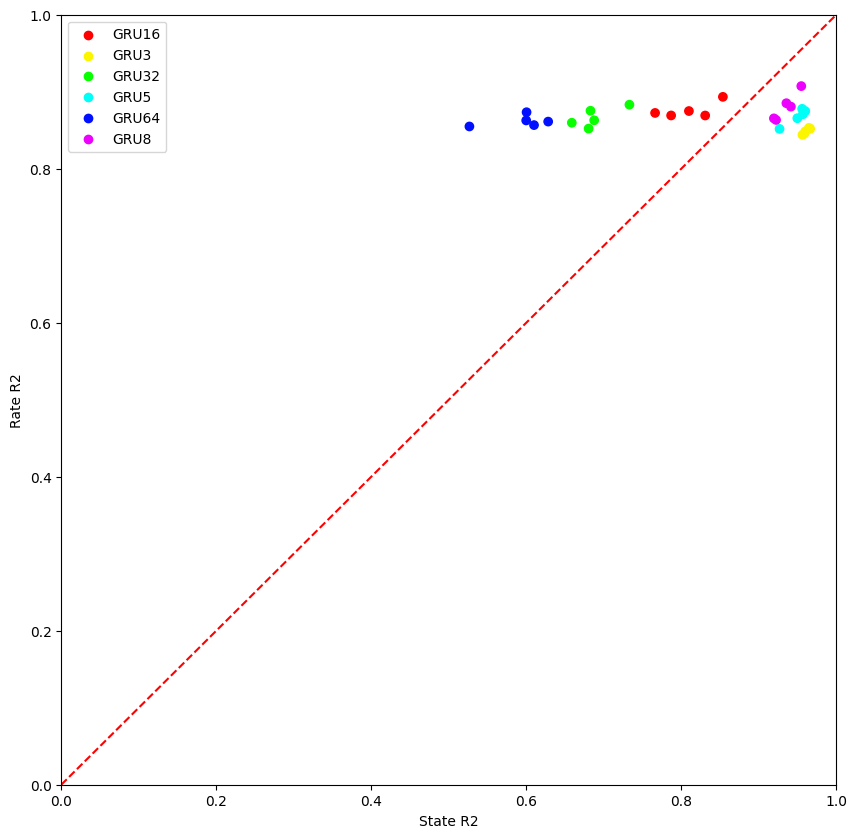

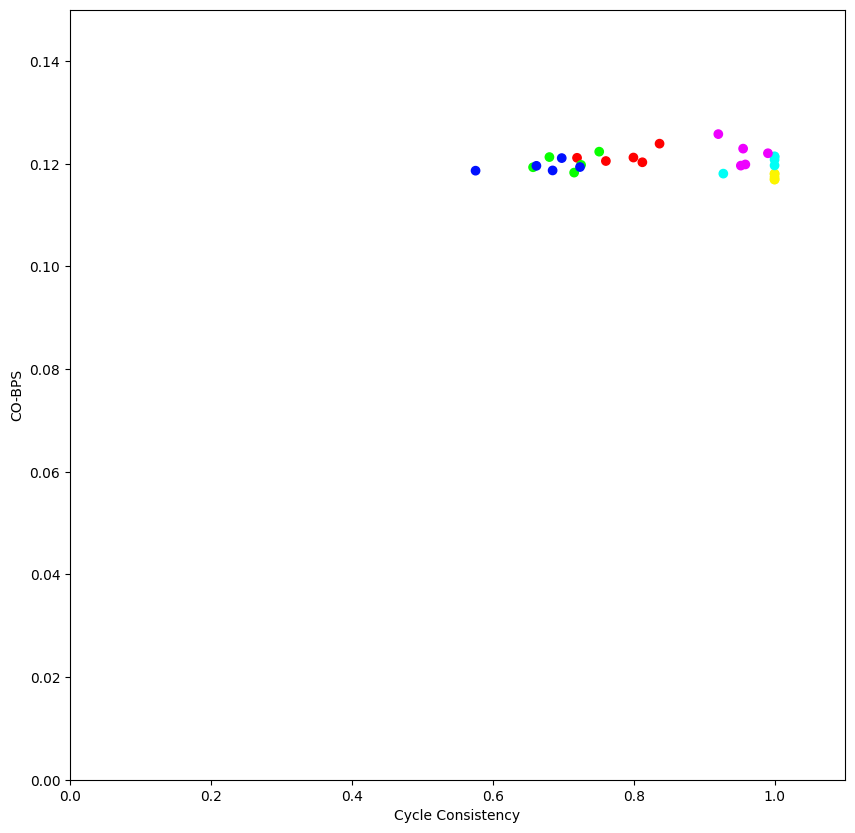

In [5]:
groups = metrics['group']
unique_groups = np.unique(groups)
print(groups)
print(unique_groups)
# group_indices = [np.where(groups == group)[0] for group in unique_groups]
colors1 = plt.cm.hsv(np.linspace(0, 1, len(unique_groups)+1))
colors_list = []
for i, group in enumerate(groups):
    colors_list.append(colors1[np.where(unique_groups == group)[0][0]])
    
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(metrics['state_r2'], metrics['rate_r2'], c = colors_list)
ax.set_xlabel("State R2")
ax.set_ylabel("Rate R2")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.plot([0, 1], [0, 1], 'r--')
for legend_group in unique_groups:
    ax.scatter([], [], c=colors1[np.where(unique_groups == legend_group)[0][0]], label=legend_group)
ax.legend()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(metrics['cycle_con'], metrics['co-bps'], c = colors_list)
ax.set_xlabel("Cycle Consistency")
ax.set_ylabel("CO-BPS")
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 0.15])


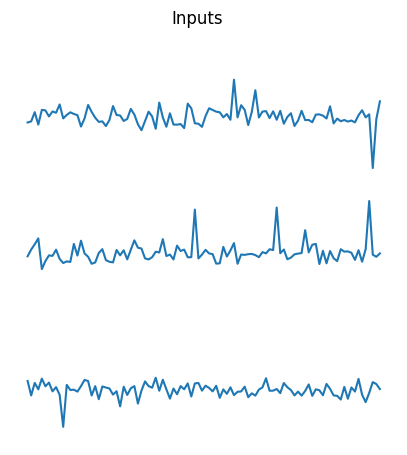

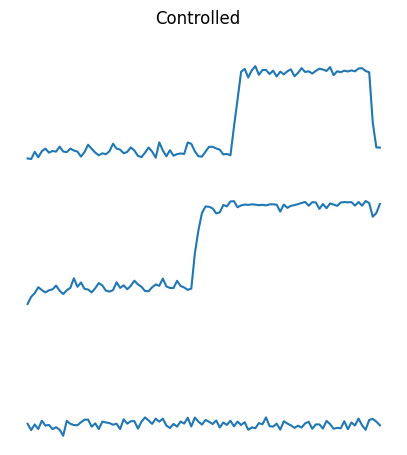

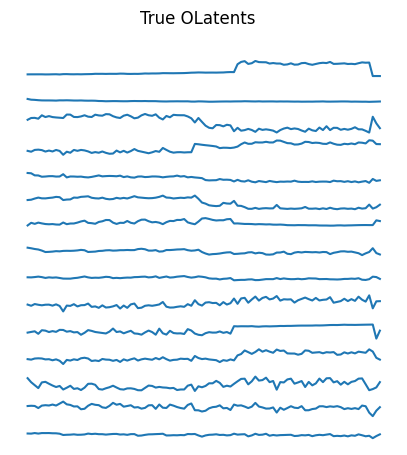

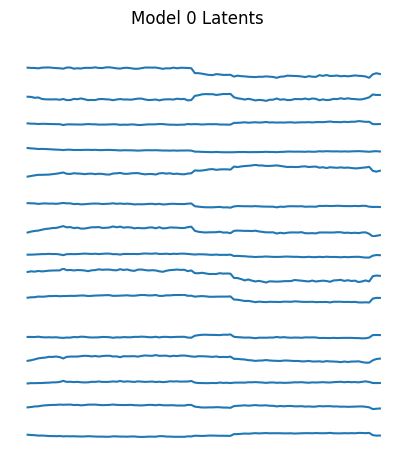

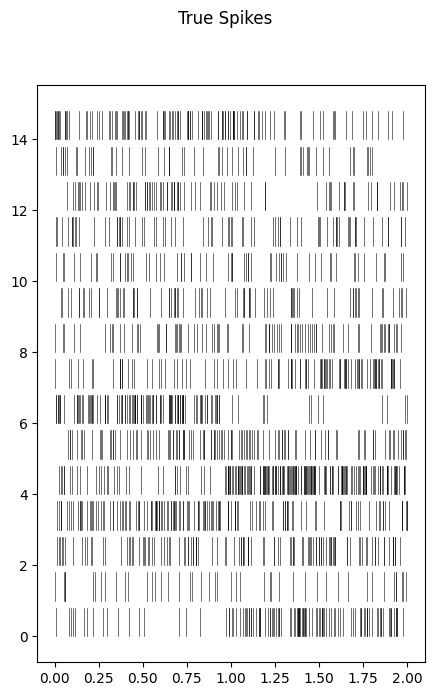

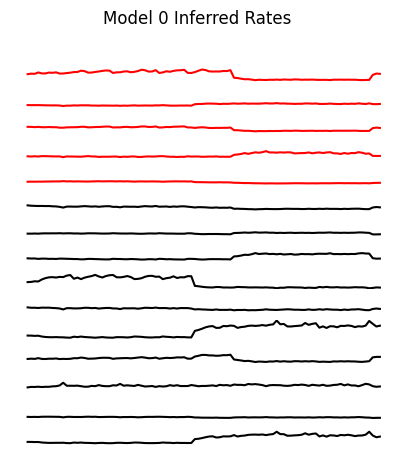

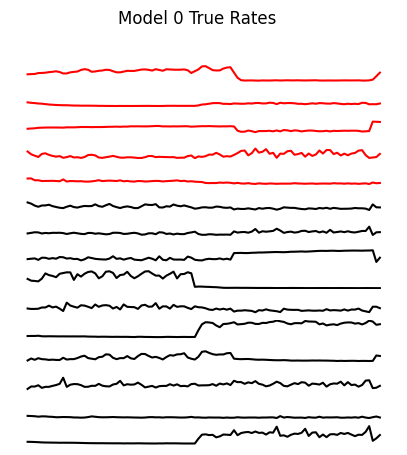

In [6]:

model0= 0
model1 = 25
model2 = 6

trial_idx = 5
neuron_idx = 53
inputs1 = comparison.analyses[model0].get_inputs(phase = 'val')
inputs2 = comparison.analyses[model1].get_inputs(phase = 'val')
inputs3 = comparison.analyses[model2].get_inputs(phase = 'val')

true_spikes = comparison.analyses[0].get_spiking(phase='val')

timevec = np.linspace(0, 10, true_spikes.shape[1])
bin_dur = timevec[1] - timevec[0]

neurons_to_plot = 15
timepoints_to_plot = 100

fig = plt.figure(figsize=(5, 5))
axes = fig.subplots(3, 1, sharey=True)
ax = axes[0]
ax.plot(inputs1[trial_idx,:timepoints_to_plot,0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax = axes[1]
ax.plot(inputs1[trial_idx,:timepoints_to_plot,1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax = axes[2]
ax.plot(inputs1[trial_idx,:timepoints_to_plot,2])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle("Inputs")
fig.savefig("input_plot.pdf")

fig = plt.figure(figsize=(5, 5))
out_dict = comparison.analyses[comparison.ref_ind].get_model_outputs(phase = 'val')
controlled = out_dict['controlled'].detach().cpu().numpy()
axes = fig.subplots(3, 1, sharey=True)
ax = axes[0]
ax.plot(controlled[trial_idx,:timepoints_to_plot,0])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])

ax = axes[1]
ax.plot(controlled[trial_idx,:timepoints_to_plot,1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])

ax = axes[2]
ax.plot(controlled[trial_idx,:timepoints_to_plot,2])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
fig.suptitle("Controlled")
fig.savefig("controlled_plot.pdf")

latents_to_plot = 15
fig = plt.figure(figsize=(5, 5))
out_dict = comparison.analyses[comparison.ref_ind].get_model_outputs(phase = 'val')
latents = out_dict['latents'].detach().cpu().numpy()
axes = fig.subplots(latents_to_plot, 1, sharey=True)
for i in range(latents_to_plot):
    ax = axes[latents_to_plot - i - 1]
    ax.plot(latents[trial_idx,:timepoints_to_plot,i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
fig.suptitle("True OLatents")
fig.savefig("latents_plot.pdf")

fig = plt.figure(figsize = (5,5))
latents = comparison.analyses[model0].get_latents(phase = 'val').detach().cpu().numpy()
axes = fig.subplots(latents_to_plot, 1, sharey=True)
for i in range(latents_to_plot):
    ax = axes[latents_to_plot - i - 1]
    ax.plot(latents[trial_idx,:timepoints_to_plot,i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
fig.suptitle("Model 0 Latents")
fig.savefig("latents_plot_model0.pdf")


fig = plt.figure(figsize=(5,neurons_to_plot/2))
ax = fig.add_subplot(111)
# Plot a raster plot of all the spikes
trial_spikes = true_spikes[trial_idx]
for i in range(neurons_to_plot):
    neuron_spikes = trial_spikes[:,i]
    for j in range(timepoints_to_plot):
        spikes = neuron_spikes[j]
        if spikes >0:
            spike_times = random.uniform(timevec[j], timevec[j]+ bin_dur, int(spikes))
            for spike_time in spike_times:
                ax.plot([spike_time, spike_time], [i, i+0.8], color='k', linewidth=0.4)
fig.suptitle("True Spikes")
fig.savefig("raster_plot.pdf")

fig = plt.figure(figsize=(5, 5))
axes = fig.subplots(neurons_to_plot, 1, sharey=True)
rates1 = comparison.analyses[model0].get_rates(phase = 'val').detach().cpu().numpy()
for i in range(neurons_to_plot):
    ax = axes[neurons_to_plot - i - 1]
    if i >9:
        ax.plot(rates1[trial_idx,:timepoints_to_plot,i], color ='r')
    else:
        ax.plot(rates1[trial_idx,:timepoints_to_plot,i], color ='k')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
fig.suptitle("Model 0 Inferred Rates")
fig.savefig("rates_plot.pdf")

fig = plt.figure(figsize=(5, 5))
axes = fig.subplots(neurons_to_plot, 1, sharey=True)
true_rates1 = comparison.analyses[model0].get_true_rates(phase = 'val').detach().cpu().numpy()
for i in range(neurons_to_plot):
    ax = axes[neurons_to_plot - i - 1]
    if i >9:
        ax.plot(true_rates1[trial_idx,:timepoints_to_plot,i], color ='r')
    else:
        ax.plot(true_rates1[trial_idx,:timepoints_to_plot,i], color ='k')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Remove the box
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
fig.suptitle("Model 0 True Rates")
fig.savefig("true_rates_plot.pdf")

    # ax.set_xlim([0, 200])

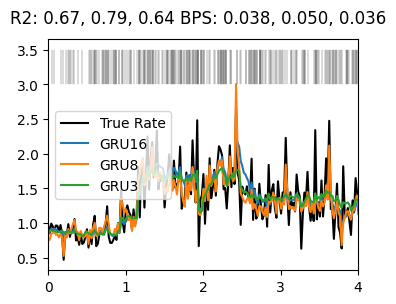

In [7]:

use_neuron_trial = True

model0= 0
model1 = 25
model2 = 6

trial_idx = 5
neuron_idx = 53

def bits_per_spike_per_neuron_trial(preds, targets):
    """
    Computes BPS for each neuron and each trial, reducing along the time dimension.
    Preds are logrates and targets are binned spike counts.
    Inputs are expected to be n_trials x n_timesteps x n_neurons arrays.
    """
    # Compute NLL for model predictions along the time dimension
    nll_model = F.poisson_nll_loss(preds, targets, full=True, log_input=True, reduction="none")
    nll_model = torch.sum(nll_model, dim=1)  # Sum over the time dimension (n_timesteps)
    
    # Compute the mean firing rate (null model) for each neuron and trial
    mean_targets = torch.mean(targets, dim=1, keepdim=True)
    
    # Compute NLL for the null model
    nll_null = F.poisson_nll_loss(
        mean_targets.expand_as(targets),  # Broadcast the mean target to match the shape of preds/targets
        targets,
        log_input=False,
        full=True,
        reduction="none"
    )
    nll_null = torch.sum(nll_null, dim=1)  # Sum over the time dimension
    
    # Compute bits per spike for each trial and each neuron
    bps = (nll_null - nll_model) / torch.nansum(targets, dim=1) / math.log(2)
    
    return bps  # Returns a tensor of shape (n_trials, n_neurons)



true_spikes = comparison.analyses[0].get_spiking(phase='val')
true_rates = comparison.analyses[0].get_true_rates(phase='val')
rates1 = comparison.analyses[model0].get_rates(phase='val').detach().cpu().numpy()
rates2 = comparison.analyses[model1].get_rates(phase='val').detach().cpu().numpy()
rates3 = comparison.analyses[model2].get_rates(phase='val').detach().cpu().numpy()
trial_spikes = true_spikes[trial_idx, :,neuron_idx]


fig = plt.figure(figsize=(4, 3))
timevec = np.linspace(0, 10, true_spikes.shape[1])
bin_dur = timevec[1] - timevec[0]
ax3 = fig.add_subplot(111)
ax3.plot(timevec, true_rates[trial_idx, :, neuron_idx], color = 'k', label = "True Rate")
ax3.plot(timevec, rates1[trial_idx, :, neuron_idx], label = comparison.analyses[model0].run_name)
ax3.plot(timevec, rates2[trial_idx, :, neuron_idx], label = comparison.analyses[model1].run_name)
ax3.plot(timevec, rates3[trial_idx, :, neuron_idx], label = comparison.analyses[model2].run_name)


r1 = torch.Tensor(rates1[trial_idx, :, neuron_idx])
r2 = torch.Tensor(rates2[trial_idx, :, neuron_idx])
r3 = torch.Tensor(rates3[trial_idx, :, neuron_idx])
t_spikes = torch.Tensor(true_spikes[trial_idx, :, neuron_idx])

if use_neuron_trial:
    bps_1 = bits_per_spike_per_neuron_trial(torch.log(torch.Tensor(rates1)), torch.Tensor(true_spikes))[trial_idx, neuron_idx]
    bps_2 = bits_per_spike_per_neuron_trial(torch.log(torch.Tensor(rates2)), torch.Tensor(true_spikes))[trial_idx, neuron_idx]
    bps_3 = bits_per_spike_per_neuron_trial(torch.log(torch.Tensor(rates3)), torch.Tensor(true_spikes))[trial_idx, neuron_idx]
    r2_1 = r2_score(true_rates[trial_idx, :, neuron_idx], rates1[trial_idx, :, neuron_idx])
    r2_2 = r2_score(true_rates[trial_idx, :, neuron_idx], rates2[trial_idx, :, neuron_idx])
    r2_3 = r2_score(true_rates[trial_idx, :, neuron_idx], rates3[trial_idx, :, neuron_idx])
else:
    bps_1 = metrics['co-bps'][model0]
    bps_2 = metrics['co-bps'][model1]
    bps_3 = metrics['co-bps'][model2]

    r2_1 = metrics['rate_r2'][model0]
    r2_2 = metrics['rate_r2'][model1]
    r2_3 = metrics['rate_r2'][model2]

for i, spike in enumerate(trial_spikes):
    if spike > 0:
        spike_times = np.linspace(timevec[i], timevec[i] + bin_dur, int(spike)+2)
        spike_times = spike_times[1:-1]
        for spike_time in spike_times:
            ax3.plot([spike_time, spike_time], [3, 3.5], color='k', linewidth=0.2)
ax3.legend()
ax3.set_xlim([0, 4])

fig.suptitle(f"R2: {r2_1:.2f}, {r2_2:.2f}, {r2_3:.2f} BPS: {bps_1:.3f}, {bps_2:.3f}, {bps_3:.3f}")
plt.savefig("spikes.pdf")



In [8]:
max_lats = 256
min_lats = 3
opacity = np.zeros(len(comparison.analyses))
latent_sizes = []
for i, analysis in enumerate(comparison.analyses):
    # Get the latent size (in run name after "GRU")
    print(i)
    if analysis.run_name.__contains__("GRU"):
        latent_size = int(analysis.run_name.split("GRU")[1])
        # Make an opacity based on the log10 of latent size
        opacity[i] = latent_size / max_lats
        latent_sizes.append(latent_size)
        print(analysis.run_name, latent_size, opacity[i])


0
GRU16 16 0.0625
1
GRU16 16 0.0625
2
GRU16 16 0.0625
3
GRU16 16 0.0625
4
GRU16 16 0.0625
5
GRU3 3 0.01171875
6
GRU3 3 0.01171875
7
GRU3 3 0.01171875
8
GRU3 3 0.01171875
9
GRU3 3 0.01171875
10
GRU32 32 0.125
11
GRU32 32 0.125
12
GRU32 32 0.125
13
GRU32 32 0.125
14
GRU32 32 0.125
15
GRU5 5 0.01953125
16
GRU5 5 0.01953125
17
GRU5 5 0.01953125
18
GRU5 5 0.01953125
19
GRU5 5 0.01953125
20
GRU64 64 0.25
21
GRU64 64 0.25
22
GRU64 64 0.25
23
GRU64 64 0.25
24
GRU64 64 0.25
25
GRU8 8 0.03125
26
GRU8 8 0.03125
27
GRU8 8 0.03125
28
GRU8 8 0.03125
29
GRU8 8 0.03125
30


In [9]:


def reconstruct_latents(lin_reg_model, N_pred, variance_threshold=0.01):
    """
    Reconstructs the latent variables from predicted log-rates using the pseudoinverse of the readout matrix,
    applying singular value thresholding.

    Parameters:
    lin_reg_model (LinearRegression): Trained LinearRegression model mapping latents to log-rates.
    N_pred (numpy.ndarray): Predicted log-rates, shape (n_samples, n_neurons).
    variance_threshold (float): Threshold for cumulative variance to retain.

    Returns:
    numpy.ndarray: Reconstructed latent variables, shape (n_samples, n_latents).
    """
    # Extract the estimated readout matrix (coefficients) and intercept
    W_hat = lin_reg_model.coef_        # Shape: (n_neurons, n_latents)
    b_hat = lin_reg_model.intercept_   # Shape: (n_neurons,)

    # Ensure N_pred is a 2D array
    if N_pred.ndim == 1:
        N_pred = N_pred.reshape(-1, 1)

    # Subtract the intercept from the predicted log-rates
    N_centered = N_pred - b_hat        # Shape: (n_samples, n_neurons)

    # Perform SVD on W_hat
    U, Sigma, Vt = np.linalg.svd(W_hat, full_matrices=False)  # W_hat = U @ diag(Sigma) @ Vt

    # Compute normalized squared singular values (variance explained)
    normalized_variance = (Sigma ** 2) / np.sum(Sigma ** 2)

    # Compute cumulative variance
    cumulative_variance = np.cumsum(normalized_variance)

    # Determine number of components to retain to capture desired variance
    num_components = np.searchsorted(cumulative_variance, (1 - variance_threshold)) + 1

    # Ensure num_components does not exceed total number of components
    num_components = min(num_components, len(Sigma))

    # Truncate the singular values and corresponding matrices
    U_trunc = U[:, :num_components]           # Shape: (n_neurons, num_components)
    Sigma_trunc = Sigma[:num_components]      # Shape: (num_components,)
    Vt_trunc = Vt[:num_components, :]         # Shape: (num_components, n_latents)

    # Compute the truncated pseudoinverse
    Sigma_inv_trunc = np.diag(1 / Sigma_trunc)  # Shape: (num_components, num_components)
    W_pinv_trunc = Vt_trunc.T @ Sigma_inv_trunc @ U_trunc.T  # Shape: (n_latents, n_neurons)

    # Reconstruct the latent variables
    L_hat = N_centered @ W_pinv_trunc.T     # Shape: (n_samples, n_latents)

    return L_hat



In [10]:
model3= 17
model8 = 22 
model64 = 12

print(comparison.analyses[model3].run_name)
print(comparison.analyses[model8].run_name)
print(comparison.analyses[model64].run_name)
# Get the true latents (train and val)
out_dict = comparison.analyses[comparison.ref_ind].get_model_outputs(phase = 'train')
true_latents = out_dict['latents'].detach().cpu().numpy()
out_val = comparison.analyses[comparison.ref_ind].get_model_outputs(phase = 'val')
true_latents_val = out_val['latents'].detach().cpu().numpy()

# Get the latents and rates for the models
model1_lats_train = comparison.analyses[model3].get_latents(phase = 'train').detach().cpu().numpy()
model2_lats_train = comparison.analyses[model8].get_latents(phase = 'train').detach().cpu().numpy()
model3_lats_train = comparison.analyses[model64].get_latents(phase = 'train').detach().cpu().numpy()

model1_lats_val = comparison.analyses[model3].get_latents(phase = 'val').detach().cpu().numpy()
model2_lats_val = comparison.analyses[model8].get_latents(phase = 'val').detach().cpu().numpy()
model3_lats_val = comparison.analyses[model64].get_latents(phase = 'val').detach().cpu().numpy()

model1_rates_train = np.log(comparison.analyses[model3].get_rates(phase = 'train').detach().cpu().numpy())
model2_rates_train = np.log(comparison.analyses[model8].get_rates(phase = 'train').detach().cpu().numpy())
model3_rates_train = np.log(comparison.analyses[model64].get_rates(phase = 'train').detach().cpu().numpy())

model1_rates_val = np.log(comparison.analyses[model3].get_rates(phase = 'val').detach().cpu().numpy())
model2_rates_val = np.log(comparison.analyses[model8].get_rates(phase = 'val').detach().cpu().numpy())
model3_rates_val = np.log(comparison.analyses[model64].get_rates(phase = 'val').detach().cpu().numpy())

# Get the number of trials, timesteps and latents
n_trials_train, n_timesteps, n_latents = true_latents.shape
n_trials_val = true_latents_val.shape[0]

# Get the PCA space for latents on the training set
pca1= PCA()
pca2= PCA()
pca3= PCA()

model1_lats_pca_train_flat = pca1.fit_transform(model1_lats_train.reshape(-1, model1_lats_train.shape[-1]))
model2_lats_pca_train_flat = pca2.fit_transform(model2_lats_train.reshape(-1, model2_lats_train.shape[-1]))
model3_lats_pca_train_flat = pca3.fit_transform(model3_lats_train.reshape(-1, model3_lats_train.shape[-1]))

model1_lats_pca_val_flat = pca1.transform(model1_lats_val.reshape(-1, model1_lats_val.shape[-1]))
model2_lats_pca_val_flat = pca2.transform(model2_lats_val.reshape(-1, model2_lats_val.shape[-1]))
model3_lats_pca_val_flat = pca3.transform(model3_lats_val.reshape(-1, model3_lats_val.shape[-1]))


# Get the PCA space for rates on the training set
pca_r1 = PCA()
pca_r2 = PCA()
pca_r3 = PCA()

model1_rates_pca_train_flat = pca_r1.fit_transform(model1_rates_train.reshape(-1, model1_rates_train.shape[-1]))
model2_rates_pca_train_flat = pca_r2.fit_transform(model2_rates_train.reshape(-1, model2_rates_train.shape[-1]))
model3_rates_pca_train_flat = pca_r3.fit_transform(model3_rates_train.reshape(-1, model3_rates_train.shape[-1]))

model1_rates_pca_val_flat = pca_r1.transform(model1_rates_val.reshape(-1, model1_rates_val.shape[-1]))
model2_rates_pca_val_flat = pca_r2.transform(model2_rates_val.reshape(-1, model2_rates_val.shape[-1]))
model3_rates_pca_val_flat = pca_r3.transform(model3_rates_val.reshape(-1, model3_rates_val.shape[-1]))

# Fit a linear regression model to map the PCA space of latents to the PCA space of rates
model1_readout = LinearRegression()
model2_readout = LinearRegression()
model3_readout = LinearRegression()

model1_readout.fit(model1_lats_pca_train_flat, model1_rates_pca_train_flat)
model2_readout.fit(model2_lats_pca_train_flat, model2_rates_pca_train_flat)
model3_readout.fit(model3_lats_pca_train_flat, model3_rates_pca_train_flat)

# Reconstruct the latents from the rates using the readout matrix and singular value thresholding
recon_latents_1 = reconstruct_latents(model1_readout, model1_rates_pca_train_flat, variance_threshold=0.01)
recon_latents_2 = reconstruct_latents(model2_readout, model2_rates_pca_train_flat, variance_threshold=0.01)
recon_latents_3 = reconstruct_latents(model3_readout, model3_rates_pca_train_flat, variance_threshold=0.01)

pred2_cc_trials = recon_latents_2.reshape(n_trials_train, n_timesteps, -1)
pred3_cc_trials = recon_latents_3.reshape(n_trials_train, n_timesteps, -1)

# Fit a linear regression model to map the true latents to the PCA space of latents
lm2 = LinearRegression()
lm3 = LinearRegression()

lm2.fit(true_latents.reshape(-1, true_latents.shape[-1]), model2_lats_pca_train_flat)
lm3.fit(true_latents.reshape(-1, true_latents.shape[-1]), model3_lats_pca_train_flat)

predInf_from_True2 = lm2.predict(true_latents_val.reshape(-1, true_latents_val.shape[-1]))
predInf_from_True3 = lm3.predict(true_latents_val.reshape(-1, true_latents_val.shape[-1]))


stateR2_2 = r2_score(model2_lats_pca_val_flat, predInf_from_True2, multioutput='raw_values')
stateR2_3 = r2_score(model3_lats_pca_val_flat, predInf_from_True3, multioutput='raw_values')

stateR2_2_VAF = r2_score(model2_lats_pca_val_flat, predInf_from_True2, multioutput='variance_weighted')
stateR2_3_VAF = r2_score(model3_lats_pca_val_flat, predInf_from_True3, multioutput='variance_weighted')

pred2_trials = predInf_from_True2.reshape(n_trials_val, n_timesteps, -1)
pred3_trials = predInf_from_True3.reshape(n_trials_val, n_timesteps, -1)

model2_pcs_trial = model2_lats_pca_val_flat.reshape(n_trials_val, n_timesteps, -1)
model3_pcs_trial = model3_lats_pca_val_flat.reshape(n_trials_val, n_timesteps, -1)

ccR2_2 = r2_score(pred2_cc_trials.reshape(-1, pred2_cc_trials.shape[-1]), model2_lats_pca_train_flat, multioutput='raw_values')
ccR2_3 = r2_score(pred3_cc_trials.reshape(-1, pred3_cc_trials.shape[-1]), model3_lats_pca_train_flat, multioutput='raw_values')

ccR2_2_VAF = r2_score(pred2_cc_trials.reshape(-1, pred2_cc_trials.shape[-1]), model2_lats_pca_train_flat, multioutput='variance_weighted')
ccR2_3_VAF = r2_score(pred3_cc_trials.reshape(-1, pred3_cc_trials.shape[-1]), model3_lats_pca_train_flat, multioutput='variance_weighted')


GRU5
GRU64
GRU32


In [11]:
# print(f"State R2: {stateR2_2}, {stateR2_3}")
print(f"State R2 VAF: {stateR2_2_VAF}, {stateR2_3_VAF}")
# print(f"Cycle Consistency R2: {ccR2_2}, {ccR2_3}")
print(f"Cycle Consistency R2 VAF: {ccR2_2_VAF}, {ccR2_3_VAF}")

State R2 VAF: 0.6021134853363037, 0.6614678502082825
Cycle Consistency R2 VAF: 0.463115394115448, 0.42080309987068176


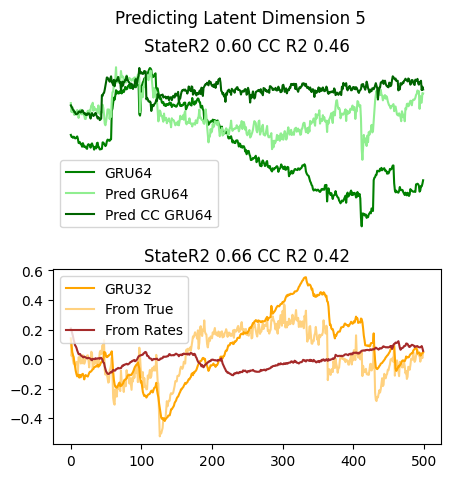

In [12]:
def hide_splines(axIn):
    axIn.spines['top'].set_visible(False)
    axIn.spines['right'].set_visible(False)
    axIn.spines['left'].set_visible(False)
    axIn.spines['bottom'].set_visible(False)
    axIn.set_yticks([])
    axIn.set_xticks([])

latent_dim = 4
trial_num =5
n_timesteps= 500
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(211)
ax.plot(model2_pcs_trial[trial_num, :n_timesteps, latent_dim], c = 'green', label = comparison.analyses[model8].run_name)
ax.plot(pred2_trials[trial_num, :n_timesteps, latent_dim], c = 'lightgreen', label = f"Pred {comparison.analyses[model8].run_name}")
ax.plot(pred2_cc_trials[trial_num, :n_timesteps, latent_dim], c = 'darkgreen', label = f"Pred CC {comparison.analyses[model8].run_name}")
# ax.set_title(f"State R2: {stateR2_2[latent_dim]:.2f}, CC R2: {ccR2_2[latent_dim]:.2f}")
ax.set_title(f"StateR2 {stateR2_2_VAF:.2f} CC R2 {ccR2_2_VAF:.2f}")
ax.legend()
hide_splines(ax)

ax = fig.add_subplot(212)
ax.plot(model3_pcs_trial[trial_num, :n_timesteps, latent_dim], c = 'orange', label = comparison.analyses[model64].run_name)
ax.plot(pred3_trials[trial_num, :n_timesteps, latent_dim], c = 'orange', alpha=0.5, label = f"From True")
ax.plot(pred3_cc_trials[trial_num, :n_timesteps, latent_dim], c = 'brown', label = f"From Rates")
# ax.set_title(f"State R2: {stateR2_3[latent_dim]:.2f}, CC R2: {ccR2_3[latent_dim]:.2f}")
ax.set_title(f"StateR2 {stateR2_3_VAF:.2f} CC R2 {ccR2_3_VAF:.2f}")
ax.legend()
# hide_splines(ax)

fig.suptitle(f"Predicting Latent Dimension {latent_dim+1}")
plt.savefig("latent_dim_pred_newCC.pdf")

In [13]:
model3= 14
model8 = 17 
model64 = 10

latent_dim = 7
trial_num = 5
out_dict = comparison.analyses[comparison.ref_ind].get_model_outputs(phase = 'val')
true_latents = out_dict['latents'].detach().cpu().numpy()
model1_lats = comparison.analyses[model3].get_latents(phase = 'val').detach().cpu().numpy()
model2_lats = comparison.analyses[model8].get_latents(phase = 'val').detach().cpu().numpy()
model3_lats = comparison.analyses[model64].get_latents(phase = 'val').detach().cpu().numpy()
print(comparison.analyses[model3].run_name)
print(comparison.analyses[model8].run_name)
print(comparison.analyses[model64].run_name)

noise_level = 0.002
eps = 1e-3

model1_rates = comparison.analyses[model3].get_rates(phase = 'val').detach().cpu().numpy() 
model1_rates_noised = model1_rates + np.random.normal(0, noise_level, size = (model1_rates.shape[0], model1_rates.shape[1], model1_rates.shape[2]))
model2_rates = comparison.analyses[model8].get_rates(phase = 'val').detach().cpu().numpy() 
model2_rates_noised = model2_rates + np.random.normal(0, noise_level, size = (model2_rates.shape[0], model2_rates.shape[1], model2_rates.shape[2]))
model3_rates = comparison.analyses[model64].get_rates(phase = 'val').detach().cpu().numpy() 
model3_rates = model3_rates + np.random.normal(0, noise_level, size = (model3_rates.shape[0], model3_rates.shape[1], model3_rates.shape[2]))

model1_rates_noised = np.clip(model1_rates, eps, None)
model2_rates_noised = np.clip(model2_rates, eps, None)
model3_rates_noised = np.clip(model3_rates, eps, None)

model1_rates = np.log(model1_rates)
model2_rates = np.log(model2_rates)
model3_rates = np.log(model3_rates)

model1_rates_noised = np.log(model1_rates_noised)
model2_rates_noised = np.log(model2_rates_noised)
model3_rates_noised = np.log(model3_rates_noised)

n_trials, n_timesteps, n_latents = true_latents.shape

pca1= PCA()
pca2= PCA()
pca3= PCA()

model1_lats_pca_flat = pca1.fit_transform(model1_lats.reshape(-1, model1_lats.shape[-1]))
model2_lats_pca_flat = pca2.fit_transform(model2_lats.reshape(-1, model2_lats.shape[-1]))
model3_lats_pca_flat = pca3.fit_transform(model3_lats.reshape(-1, model3_lats.shape[-1]))

# model1_latentDim = model1_lats_pca_flat[:,latent_dim]
model2_latentDim = model2_lats_pca_flat[:,latent_dim]
model3_latentDim = model3_lats_pca_flat[:,latent_dim]

fig = plt.figure(figsize=(5, 5))
# lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()

# cc_lm1 = LinearRegression()
cc_lm2 = LinearRegression()
cc_lm3 = LinearRegression()

# lm1.fit(true_latents.reshape(-1, true_latents.shape[-1]), model1_latentDim)
lm2.fit(true_latents.reshape(-1, true_latents.shape[-1]), model2_latentDim)
lm3.fit(true_latents.reshape(-1, true_latents.shape[-1]), model3_latentDim)

# cc_lm1.fit(model1_rates.reshape(-1, model1_rates.shape[-1]), model1_latentDim)
cc_lm2.fit(model2_rates.reshape(-1, model2_rates.shape[-1]), model2_latentDim)
cc_lm3.fit(model3_rates.reshape(-1, model3_rates.shape[-1]), model3_latentDim)

# pred1 = lm1.predict(true_latents.reshape(-1, true_latents.shape[-1]))
pred2 = lm2.predict(true_latents.reshape(-1, true_latents.shape[-1]))
pred3 = lm3.predict(true_latents.reshape(-1, true_latents.shape[-1]))

# pred_cc1 = cc_lm1.predict(model1_rates_noised.reshape(-1, model1_rates.shape[-1]))
pred_cc2 = cc_lm2.predict(model2_rates_noised.reshape(-1, model2_rates.shape[-1]))
pred_cc3 = cc_lm3.predict(model3_rates_noised.reshape(-1, model3_rates.shape[-1]))

# stateR2_1 = r2_score(model1_latentDim, pred1)
stateR2_2 = r2_score(model2_latentDim, pred2)
stateR2_3 = r2_score(model3_latentDim, pred3)

# ccR2_1 = r2_score(model1_latentDim, pred_cc1)
ccR2_2 = r2_score(model2_latentDim, pred_cc2)
ccR2_3 = r2_score(model3_latentDim, pred_cc3)

# pred1_trials = pred1.reshape(n_trials, n_timesteps)
pred2_trials = pred2.reshape(n_trials, n_timesteps)
pred3_trials = pred3.reshape(n_trials, n_timesteps)

# pred1_cc_trials = pred_cc1.reshape(n_trials, n_timesteps)
pred2_cc_trials = pred_cc2.reshape(n_trials, n_timesteps)
pred3_cc_trials = pred_cc3.reshape(n_trials, n_timesteps)

# model1_pcs_trial = model1_latentDim.reshape(n_trials, n_timesteps)
model2_pcs_trial = model2_latentDim.reshape(n_trials, n_timesteps)
model3_pcs_trial = model3_latentDim.reshape(n_trials, n_timesteps)

model_1_name = comparison.analyses[model3].run_name
model_2_name = comparison.analyses[model8].run_name
model_3_name = comparison.analyses[model64].run_name

# ax = fig.add_subplot(311)
# ax.plot(model1_pcs_trial[trial_num, :n_timesteps],c='blue', label = comparison.analyses[model3].run_name)
# ax.plot(pred1_trials[trial_num, :n_timesteps],c = 'lightblue', label = f"Pred {comparison.analyses[model3].run_name}")
# ax.plot(pred1_cc_trials[trial_num, :n_timesteps], c = 'darkblue', label = f"Pred CC {comparison.analyses[model3].run_name}")
# hide_splines(ax)
# ax.set_title(f"{model_1_name} State R2: {stateR2_1:.2f} CC R2: {ccR2_1:.2f}")

ax = fig.add_subplot(312)
ax.plot(model2_pcs_trial[trial_num, :n_timesteps], c = 'green', label = comparison.analyses[model8].run_name)
ax.plot(pred2_trials[trial_num, :n_timesteps], c = 'lightgreen', label = f"Pred {comparison.analyses[model8].run_name}")
ax.plot(pred2_cc_trials[trial_num, :n_timesteps], c = 'darkgreen', label = f"Pred CC {comparison.analyses[model8].run_name}")
ax.legend()
hide_splines(ax)
ax.set_title(f"{model_2_name} State R2: {stateR2_2:.2f} CC R2: {ccR2_2:.2f}")

ax = fig.add_subplot(313)
ax.plot(model3_pcs_trial[trial_num, :n_timesteps], c = 'orange', label = comparison.analyses[model64].run_name)
ax.plot(pred3_trials[trial_num, :n_timesteps], c = 'orange', alpha=0.5, label = f"Pred {comparison.analyses[model64].run_name}")
ax.plot(pred3_cc_trials[trial_num, :n_timesteps], c = 'brown', label = f"Pred CC {comparison.analyses[model64].run_name}")
hide_splines(ax)
ax.set_title(f"{model_3_name} State R2: {stateR2_3:.2f} CC R2: {ccR2_3:.2f}")

fig.suptitle(f"Predicting Latent Dimension {latent_dim+1}")
plt.savefig("latent_dim_pred.pdf")

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Scatter the stateR2 vs. linear cycle consistency 
ax.scatter(metrics['cycle_con'], metrics['state_r2'], c = 'k', alpha = opacity)
ax.scatter(metrics['cycle_con'][model8], metrics['state_r2'][model8], c = 'blue', label = comparison.analyses[model8].run_name)
ax.text(metrics['cycle_con'][model8], metrics['state_r2'][model8], f"{metrics['cycle_con'][model8]:.3f}, {metrics['state_r2'][model8]:.3f}", color = "blue")
ax.scatter(metrics['cycle_con'][model3], metrics['state_r2'][model3], c = 'green', label = comparison.analyses[model3].run_name)
ax.text(metrics['cycle_con'][model3], metrics['state_r2'][model3], f"{metrics['cycle_con'][model3]:.3f}, {metrics['state_r2'][model3]:.3f}", color = "green")
ax.scatter(metrics['cycle_con'][model64], metrics['state_r2'][model64], c = 'orange', label = comparison.analyses[model64].run_name)
ax.text(metrics['cycle_con'][model64], metrics['state_r2'][model64], f"{metrics['cycle_con'][model64]:.3f}, {metrics['state_r2'][model64]:.3f}", color = 'orange')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_ylabel("State R2")
ax.set_xlabel("Cycle Consistency")
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1]) 
ax.legend(loc = 'upper left')
plt.savefig("stateR2_vs_cycle_con.pdf")

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Scatter the stateR2 vs. linear cycle consistency 
ax.scatter(metrics['co-bps'], metrics['rate_r2'], c = 'k', alpha = opacity)
ax.scatter(metrics['co-bps'][model3], metrics['rate_r2'][model3], c = 'g', label = comparison.analyses[model3].run_name)
ax.text(metrics['co-bps'][model3], metrics['rate_r2'][model3], f"{metrics['co-bps'][model3]:.3f}, {metrics['rate_r2'][model3]:.3f}", color = "green")
ax.scatter(metrics['co-bps'][model8], metrics['rate_r2'][model8], c = 'blue', label = comparison.analyses[model8].run_name)
ax.text(metrics['co-bps'][model8], metrics['rate_r2'][model8], f"{metrics['co-bps'][model8]:.3f}, {metrics['rate_r2'][model8]:.3f}", color = "blue")
ax.scatter(metrics['co-bps'][model64], metrics['rate_r2'][model64], c = 'orange', label = comparison.analyses[model64].run_name)
ax.text(metrics['co-bps'][model64], metrics['rate_r2'][model64], f"{metrics['co-bps'][model64]:.3f}, {metrics['rate_r2'][model64]:.3f}", color = 'orange')
# ax.plot([0, 1], [0, 1], 'k--')

ax.set_xlabel("co-bps")
ax.set_ylabel("Rate R2")
ax.set_xlim([0.11, 0.13])
ax.set_ylim([0.8, 0.95]) 
ax.set_xticks([0.11, 0.12, 0.13])
ax.set_yticks([0.8, 0.85, 0.9, 0.95])
ax.set_xticklabels([0.11, 0.12, 0.13])
ax.set_yticklabels([0.8, 0.85, 0.9, 0.95])
ax.legend(loc= 'upper left')
plt.savefig("rateR2_vs_cobps.pdf")

GRU32
GRU5
GRU32


IndexError: index 7 is out of bounds for axis 1 with size 5

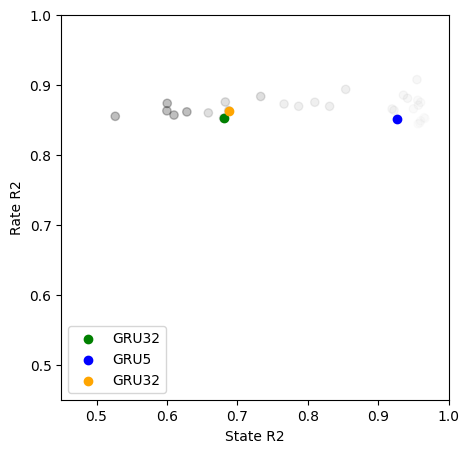

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Scatter the stateR2 vs. linear cycle consistency 
ax.scatter(metrics['state_r2'], metrics['rate_r2'], c = 'k', alpha = opacity)
ax.scatter(metrics['state_r2'][model3], metrics['rate_r2'][model3], c = 'g', label = comparison.analyses[model3].run_name)
ax.scatter(metrics['state_r2'][model8], metrics['rate_r2'][model8], c = 'blue', label = comparison.analyses[model8].run_name)
ax.scatter(metrics['state_r2'][model64], metrics['rate_r2'][model64], c = 'orange', label = comparison.analyses[model64].run_name)

ax.set_xlabel("State R2")
ax.set_ylabel("Rate R2")
ax.set_xlim([0.45, 1.0])
ax.set_ylim([0.45, 1.0]) 
ax.legend(loc= 'lower left')
plt.savefig("rateR2_vs_stateR2.pdf")

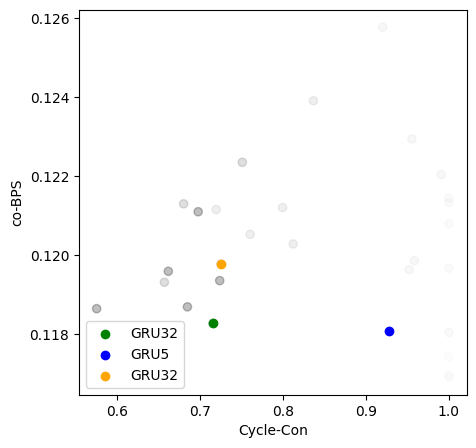

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Scatter the stateR2 vs. linear cycle consistency 
ax.scatter(metrics['cycle_con'], metrics['co-bps'], c = 'k', alpha = opacity)
ax.scatter(metrics['cycle_con'][model3], metrics['co-bps'][model3], c = 'g', label = comparison.analyses[model3].run_name)
ax.scatter(metrics['cycle_con'][model8], metrics['co-bps'][model8], c = 'blue', label = comparison.analyses[model8].run_name)
ax.scatter(metrics['cycle_con'][model64], metrics['co-bps'][model64], c = 'orange', label = comparison.analyses[model64].run_name)

ax.set_xlabel("Cycle-Con")
ax.set_ylabel("co-BPS")
# ax.set_xlim([0.45, 1.0])
# ax.set_ylim([0.45, 1.0]) 
ax.legend(loc= 'lower left')
plt.savefig("coBPS_vs_cycleCon.pdf")

Text(0, 0.5, 'StateR2')

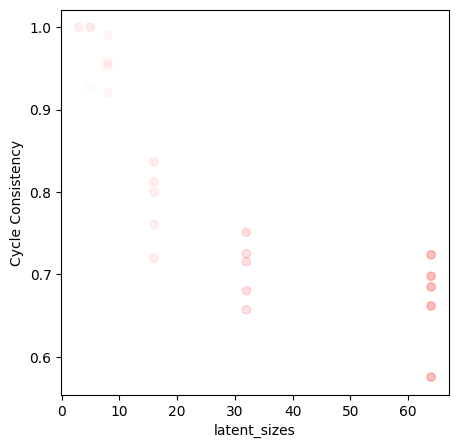

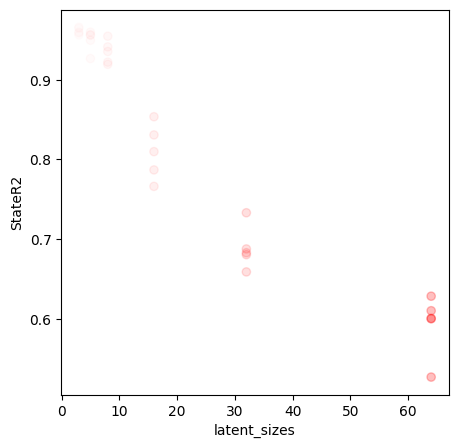

In [16]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Scatter the stateR2 vs. linear cycle consistency 
ax.scatter(latent_sizes, metrics['cycle_con'], c = 'r', alpha = opacity)
ax.set_xlabel("latent_sizes")
ax.set_ylabel("Cycle Consistency")

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Scatter the stateR2 vs. linear cycle consistency 
ax.scatter(latent_sizes, metrics['state_r2'], c = 'r', alpha = opacity)
ax.set_xlabel("latent_sizes")
ax.set_ylabel("StateR2")